In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


# Download data

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

# Prepare data

In [0]:
X_train_full = X_train_full.reshape(X_train_full.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
#get intensity between 0 and 1 instead of 0 and 255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_valid.shape

(5000, 28, 28, 1)

In [9]:
#classes are well spreaded
print(np.unique(y_train,return_counts=True))
print(np.unique(y_valid,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5444, 6179, 5470, 5638, 5307, 4987, 5417, 5715, 5389, 5454]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([479, 563, 488, 493, 535, 434, 501, 550, 462, 495]))


# Create Neural Network

In [0]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',input_shape=[28, 28, 1],activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=12,validation_data=(X_valid, y_valid))

Epoch 1/12
1719/1719 [==============================] - 62s 36ms/step - loss: 0.5506 - accuracy: 0.8327 - val_loss: 0.2147 - val_accuracy: 0.9310
Epoch 2/12
1719/1719 [==============================] - 61s 35ms/step - loss: 0.1517 - accuracy: 0.9545 - val_loss: 0.1343 - val_accuracy: 0.9610
Epoch 3/12
1719/1719 [==============================] - 60s 35ms/step - loss: 0.1025 - accuracy: 0.9687 - val_loss: 0.0793 - val_accuracy: 0.9754
Epoch 4/12
1719/1719 [==============================] - 60s 35ms/step - loss: 0.0802 - accuracy: 0.9760 - val_loss: 0.0674 - val_accuracy: 0.9786
Epoch 5/12
1719/1719 [==============================] - 60s 35ms/step - loss: 0.0677 - accuracy: 0.9797 - val_loss: 0.0652 - val_accuracy: 0.9796
Epoch 6/12
1719/1719 [==============================] - 61s 36ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 7/12
1719/1719 [==============================] - 62s 36ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0601 -

# Visualize performance

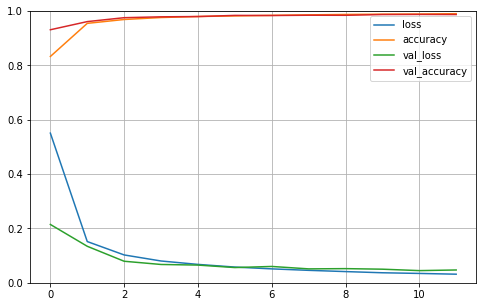

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 6.0057 - accuracy: 0.9851


[6.005655288696289, 0.9850999712944031]

# Make prediction

In [16]:
img = X_test[0]
# Reshape image
new_img = img.reshape((img.shape[0], -1))
new_img.shape

(28, 28)

In [17]:
Image.fromarray(new_img)

In [18]:
np.argmax(model.predict(X_test[0:1]),axis=1)

array([7])